In [354]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [355]:
cube_shuffle = [i for i in range(1,7)]
memory_loc = {}
for i in range(1000):
    select_num = np.random.choice(cube_shuffle)
    num_dart = str(select_num)
    x_loc = np.random.normal(select_num,0.1)
    y_loc = np.random.normal(0,0.1)
    if num_dart in memory_loc:
        memory_loc[num_dart].append([x_loc, y_loc])
    else :
        memory_loc[num_dart]=[[x_loc, y_loc]]

/Users/shun/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


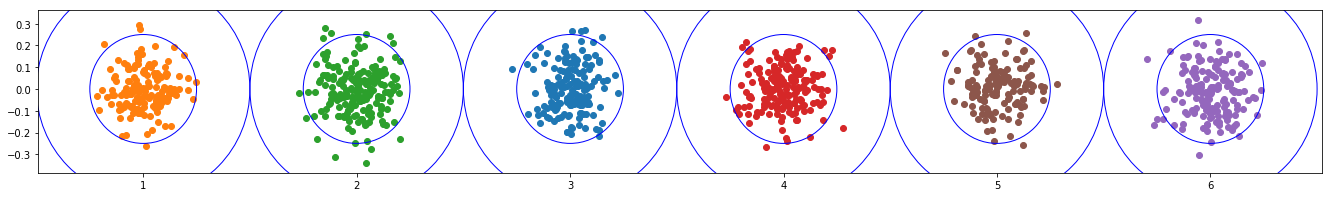

In [356]:
x_loc_all = []
y_loc_all = []
for x in memory_loc.keys():
    x_loc_all.append([x[0] for x in memory_loc[x]])
    y_loc_all.append([x[1] for x in memory_loc[x]])
    
plt.figure(figsize=(23,3))
for x_list, y_list in zip(x_loc_all, y_loc_all):
    plt.scatter(x_list, y_list)

ax = plt.axes()
for i in range(1,7):
    c = patches.Circle(xy=(i, 0), radius=0.5, ec='b', fill=False)
    c2 = patches.Circle(xy=(i, 0), radius=0.25, ec='b', fill=False)
    ax.add_patch(c)
    ax.add_patch(c2)
plt.show()

# 関数化

In [357]:
def dart_simulate(dart_num, count):
    cube_shuffle = [i for i in range(1,dart_num+1)]
    memory_loc = {}
    for i in range(count):
        select_num = np.random.choice(cube_shuffle)
        num_dart = str(select_num)
        x_loc = np.random.normal(select_num,0.1)
        y_loc = np.random.normal(0,0.1)
        if num_dart in memory_loc:
            memory_loc[num_dart].append([x_loc, y_loc])
        else :
            memory_loc[num_dart]=[[x_loc, y_loc]]

    x_loc_all = []
    y_loc_all = []
    for x in memory_loc.keys():
        x_loc_all.append([x[0] for x in memory_loc[x]])
        y_loc_all.append([x[1] for x in memory_loc[x]])
    
    plt.figure(figsize=(3*dart_num+(dart_num-5), 3))
    ax = plt.axes()
    num_count = 1
    for x_list, y_list in zip(x_loc_all, y_loc_all):
        plt.scatter(x_list, y_list)
        c = patches.Circle(xy=(num_count, 0), radius=0.5, ec='b', fill=False)
        c2 = patches.Circle(xy=(num_count, 0), radius=0.25, ec='b', fill=False)
        ax.add_patch(c)
        ax.add_patch(c2)
        num_count += 1
    return plt.show()

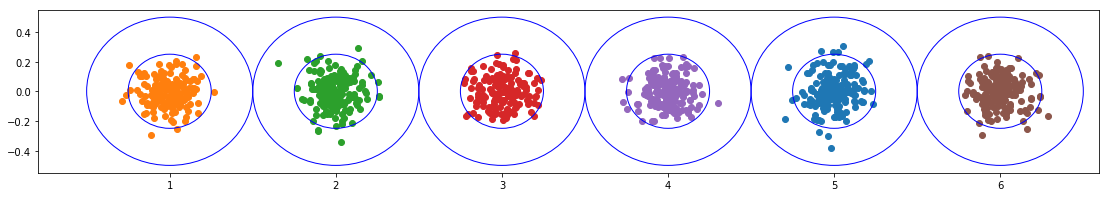

In [358]:
dart_simulate(6,1000)

# 関数にしただけでは機能がわかりづらいのでクラス化する

In [371]:
class Dart():
    def __init__(self, dart_num, count):
        self.dart_num = dart_num
        self.count = count
        self.memory_loc = {}
        
    def dart_simulate(self, dev):
        cube_shuffle = [i for i in range(1, self.dart_num+1)]
        for i in range(self.count):
            select_num = np.random.choice(cube_shuffle)
            num_dart = str(select_num)
            x_loc = np.random.normal(select_num, dev)
            y_loc = np.random.normal(0, dev)
            if num_dart in self.memory_loc:
                self.memory_loc[num_dart].append([x_loc, y_loc])
            else:
                self.memory_loc[num_dart]=[[x_loc, y_loc]]
    
    def make_list(self):       
        x_loc_all = []
        y_loc_all = []
        for x in self.memory_loc.keys():
            x_loc_all.append([x[0] for x in self.memory_loc[x]])
            y_loc_all.append([x[1] for x in self.memory_loc[x]])
        return x_loc_all, y_loc_all
    
    def plot_dist(self, x_loc_all, y_loc_all):
        # ダーツのまとの数が変わっても、まとが円になるように図の縦横比を適当に調整（式は適当）
        # ダーツのまとの数が4~20くらいまでなら下の式でいける
        plt.figure(figsize=(3*self.dart_num+(self.dart_num-5),3))
        ax = plt.axes()
        num_count = 1
        for x_list, y_list in zip(x_loc_all, y_loc_all):
            plt.scatter(x_list, y_list)
            c = patches.Circle(xy=(num_count, 0), radius=0.5, ec='b', fill=False)
            c2 = patches.Circle(xy=(num_count, 0), radius=0.5*2/3, ec='b', fill=False)
            c3 = patches.Circle(xy=(num_count, 0), radius=0.5*1/3, ec='b', fill=False)
            ax.add_patch(c)
            ax.add_patch(c2)
            ax.add_patch(c3)
            num_count += 1
        return plt.show()

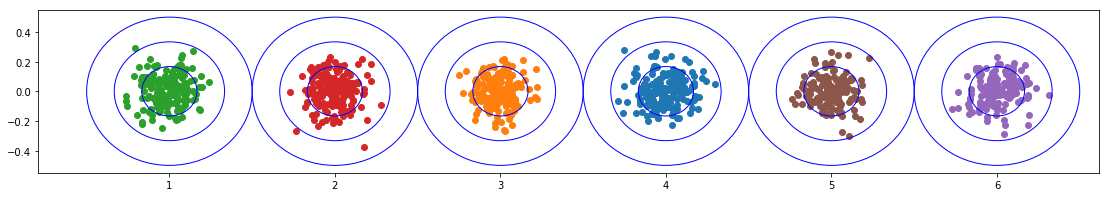

In [372]:
throw = Dart(6,1000)
# ダーツを投げる
throw.dart_simulate(0.1)
# ダーツが刺さった場所を配列化する(辞書から座標を取り出す。)
x_loc_all, y_loc_all = throw.make_list()
# 取り出した座標をプロットする
throw.plot_dist(x_loc_all, y_loc_all)